## **Preprocesamiento completo de datos de cartera**
Este notebook incluye limpieza, codificación, transformación, manejo de nulos y outliers, escalado y aplicación de PCA.

### **Librerías**

In [303]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from difflib import get_close_matches
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

### **Cargue de datos**

In [304]:
ruta_cierre = r"C:\Users\USER\OneDrive - universidadean.edu.co\2. Semestre\Seminario de investigación\Modulo 2\Modelo ML\data\raw\consolidado_cierres_Mod.xlsx"
df_cartera = pd.read_excel(ruta_cierre)

In [305]:
df=df_cartera.copy()
# Muestra todas las columnas
pd.set_option('display.max_columns', None)

# Opcional: también puedes ajustar el ancho máximo por columna si se corta el contenido
pd.set_option('display.max_colwidth', None)

# Ahora imprime tu DataFrame
df.head(5)


,NUMERO DE LA COLOCACION,NUMERO DE IDENTIFICACION DEUDOR,NUMERO DEL PRODUCTO,NUMERO DE LA AGENCIA,PLAZO UNIDAD TIEMPO,PLAZO EN DIAS,NUMERO DE PAGOS PACTA,UNIDAD DE TIEMPO,VALOR ORIGINAL DEL PR,CAPITAL PEND POR FACT,FECHA APERTURA DEL PR,SALDO DEL PRESTAMO,NRO PLAN PAGOS VIGENT,NRO DE UTILIZACINES D,DIAS DE MORA,CALIFICACION CARTERA,FEC CUOTA MAS ANTIG PENDIENTE DE PAGO,FEC PROX PAGO,FECHA EFEC ULTIMO PAGO,VLR ULTIMO PAGO,VLR TASA,VLR CUOTA MES,VLR MINIMO DE PAGO,DIA VENCIMIENTO CUOTA,NRO CUOTAS VENCIDAS,NRO CUOTAS PAGADAS,NRO CUOTAS RESTANTE,NIVEL DE ESTUDIOS,MARCA,TIPO DE SOLICITANTE,TIPO DE ID,OCUPACIÓN,ACIERTA,TIPO DE VIVIENDA,ANTIGÜEDAD LABORAL,ESTADO CIVIL,NUMERO DE PERSONAS A CARGO,INGRESOS,TIPO DE VEHICULO,TIPO DE SERVICIO,PRODUCTO,FECHA_CIERRE
0,90,52743777,905,223,72,2160,72,M,50000000,0.0,20170912,19879034.0,2,43.0,1551.0,IN,20191102.0,20210602,20191001.0,44606931.0,15.98540,102006,46184825.0,2,20.0,24,48.0,BACHILLERATO,KIA,INDEPENDIENTE,CEDULA,NO DEFINIDO,0,FAMILIAR,60,UNION LIBRE,0,6800000,NUEVO,PARTICULAR,CARTERA CASTIGADA,2024-01-31
1,148,80138994,905,222,60,1800,60,M,42850000,0.0,20171003,9995618.0,1,45.0,1172.0,IN,20201115.0,20210815,20201009.0,38415108.0,20.47944,510642,20618246.0,15,10.0,35,25.0,TECNOLOGICO,KIA,INDEPENDIENTE,CEDULA,COMERCIANTE,0,FAMILIAR,50,UNION LIBRE,0,7650000,NUEVO,PARTICULAR,CARTERA CASTIGADA,2024-01-31
2,185,1020770824,905,203,60,1800,60,M,33975000,0.0,20171031,32849398.0,1,59.0,2141.0,IN,20180322.0,20221022,20180802.0,2064553.0,25.06553,195106,85914638.0,22,56.0,3,57.0,PROFESIONAL,KIA,EMPLEADO,CEDULA,NO DEFINIDO,0,FAMILIAR,9,SOLTERO,0,3516860,NUEVO,PARTICULAR,CARTERA CASTIGADA,2024-01-31
3,189,1073671165,9,221,72,2160,72,M,31320000,0.0,20171031,3198913.0,3,44.0,14.0,AA,20240117.0,20240117,20231217.0,1700000.0,28.63795,3317850,3363836.0,17,1.0,71,1.0,BACHILLERATO,KIA,INDEPENDIENTE,CEDULA,PROFESIONAL INDEPENDIENTE,0,ARRENDADA,60,UNION LIBRE,2,5000000,NUEVO,PARTICULAR,VEHICULO CONSUMO,2024-01-31
4,199,1013601031,9,223,54,1620,51,M,53606700,8830472.8,20171103,10882092.8,6,40.0,14.0,B,20240117.0,20240217,20240130.0,2691030.0,23.54290,1421293,1433500.0,17,1.0,46,5.0,PROFESIONAL,KIA,EMPLEADO,CEDULA,NO DEFINIDO,0,FAMILIAR,48,SOLTERO,0,14800000,NUEVO,PARTICULAR,VEHICULO CONSUMO,2024-01-31


In [306]:
df.drop(columns=['UNIDAD DE TIEMPO'], inplace=True)

In [307]:
df.shape

(45011, 41)

| Producto                                | Descripción breve                                                              |
|-----------------------------------------|--------------------------------------------------------------------------------|
| CARTERA CASTIGADA                       | Créditos irrecuperables.                                                      |
| VEHICULO CONSUMO                        | Crédito para vehículo personal.                                               |
| VEHICULO COMERCIAL                      | Crédito para vehículo de uso comercial.                                       |
| POLIZA TODO RIESGO CASTIGO              | Seguro de vehículo asociado a crédito castigado.                              |
| PRESTAMOS SINIESTROS                    | Crédito vinculado a eventos con siniestros.                                   |
| VEHICULO CASTIGO                        | Crédito de vehículo que fue castigado.                                        |
| CALAMIDAD DOMESTICA CASTIGO            | Crédito por emergencia que fue castigado.                                     |
| CALAMIDAD DOMESTICA                     | Crédito para atender emergencias en el hogar.                                 |
| VEHICULO ALIVIO                         | Refinanciación de crédito vehicular.                                          |
| POLIZA TODO RIESGO                      | Seguro a todo riesgo vigente.                                                 |
| POLIZA ANT                              | Póliza anterior o vencida.                                                    |
| POSVENTA                                | Servicios posteriores a la venta.                                             |
| POLIZA MASCOTAS                         | Seguro para mascotas.                                                         |
| VEHICULO NOVACION                       | Reestructuración de crédito para vehículo.                                    |
| MOTO CASTIGO                            | Crédito para moto que fue castigado.                                          |
| RECUPERACION VEHICULO SIN CAUSACION     | Recuperación sin causa directa documentada.                                   |


In [308]:
# Estandarizar la columna PRODUCTO
df['PRODUCTO'] = df['PRODUCTO'].astype(str).str.upper().str.strip()

# Eliminar registros con productos asociados a mora
productos_en_mora = [
    'CARTERA CASTIGADA',
    'VEHICULO CASTIGO',
    'POLIZA TODO RIESGO CASTIGO',
    'PRESTAMOS SINIESTROS',
    'CALAMIDAD DOMESTICA CASTIGO',
    'MOTO CASTIGO',
    'RECUPERACION VEHICULO SIN CAUSACION'
]
df = df[~df['PRODUCTO'].isin(productos_en_mora)]

df.shape


(39011, 41)

In [309]:
# Reemplazar nulos con 0
df['DIAS DE MORA'] = pd.to_numeric(df['DIAS DE MORA'], errors='coerce').fillna(0)
df['NRO CUOTAS VENCIDAS'] = pd.to_numeric(df['NRO CUOTAS VENCIDAS'], errors='coerce').fillna(0)

### **Creación de la etiqueta multicategoría**

Se genera una nueva variable que clasifica el comportamiento de cada crédito en función del cambio en su condición de mora en el mes siguiente. Para esto se usa la columna **`DIAS DE MORA`** como criterio principal.

---

#### Criterio para definir si un crédito está en mora:

- Un crédito se considera **"en mora"** si tiene **más de 30 días de mora** (`DIAS DE MORA > 30`).
- Caso contrario, se considera **"al día"**.

---

#### Clases definidas:

| Clase | Descripción            |
|-------|-------------------------|
| 0     | Se mantiene al día      |
| 1     | Entra en mora           |
| 2     | Sale de mora            |
| 3     | Se mantiene en mora     |

---

#### Lógica para transición entre meses:

- Se ordenan los datos por `NUMERO DE LA COLOCACION` y `FECHA_CIERRE`.
- Se compara el estado de mora del mes actual con el del mes siguiente, agrupando por crédito.
- Se genera la nueva columna `ESTADO_MORA_SIGUIENTE` con las 4 clases.





In [310]:
# Asegurarse que las fechas estén bien
df['FECHA_CIERRE'] = pd.to_datetime(df['FECHA_CIERRE'], errors='coerce')

# Ordenar el DataFrame por crédito y por fecha
df = df.sort_values(['NUMERO DE LA COLOCACION', 'FECHA_CIERRE'])

# Crear estado actual de mora: 1 si tiene más de 30 días de mora
df['MORA_ACTUAL'] = (df['DIAS DE MORA'] > 30).astype(int)

# Estado del mes siguiente usando shift(-1) por cada colocación
df['MORA_SIGUIENTE'] = df.groupby('NUMERO DE LA COLOCACION')['MORA_ACTUAL'].shift(-1)

# Crear función para clasificar transición
def clasificar_estado(actual, siguiente):
    if pd.isna(siguiente): return None
    if actual == 0 and siguiente == 0: return 0  # Se mantiene al día
    elif actual == 0 and siguiente == 1: return 1  # Entra en mora
    elif actual == 1 and siguiente == 0: return 2  # Sale de mora
    elif actual == 1 and siguiente == 1: return 3  # Se mantiene en mora

# Aplicar función fila por fila
df['ESTADO_MORA_SIGUIENTE'] = [
    clasificar_estado(a, b) for a, b in zip(df['MORA_ACTUAL'], df['MORA_SIGUIENTE'])
]

# Eliminar filas sin valor en la etiqueta (últimos registros sin siguiente mes)
df = df.dropna(subset=['ESTADO_MORA_SIGUIENTE'])
df['ESTADO_MORA_SIGUIENTE'] = df['ESTADO_MORA_SIGUIENTE'].astype(int)


In [311]:
df.shape

(34939, 44)

### **Normalizar columnas categóricas**

#### Normalizar con difflib

Verificar posibles incosistencias en variables categóricas

In [312]:
columnas = ['MARCA','NIVEL DE ESTUDIOS', 'TIPO DE SOLICITANTE', 'TIPO DE ID',
    'OCUPACIÓN', 'TIPO DE VIVIENDA', 'ESTADO CIVIL',
    'TIPO DE VEHICULO', 'TIPO DE SERVICIO', 'PRODUCTO']

print("Posibles categorías repetidas por similitud ortográfica:\n")

# Umbral de similitud: cuanto más bajo, más estricta es la detección
umbral = 0.85  # Puedes ajustar entre 0.7 - 0.95

for col in columnas:
    categorias = df[col].dropna().unique().tolist()
    categorias = sorted(set(map(str, categorias)))  # <- Conversión a str

    revisadas = set()
    sospechosas = []

    for cat in categorias:
        similares = get_close_matches(cat, categorias, n=5, cutoff=umbral)
        similares = [s for s in similares if s != cat and s not in revisadas]
        if similares:
            sospechosas.append((cat, similares))
            revisadas.update(similares)

    if sospechosas:
        print(f"{col}:")
        for base, similares in sospechosas:
            print(f"   - '{base}' ↔ {similares}")
    else:
        print(f"{col}: Sin posibles duplicados ortográficos detectados.")




Posibles categorías repetidas por similitud ortográfica:

MARCA:
   - '                     ' ↔ ['N                    ', 'SMW                  ', 'KIA                  ', 'JMC                  ']
   - 'AUDI                 ' ↔ ['SAIL                 ', 'MAZDA                ', 'JKIA                 ']
   - 'DFSK                 ' ↔ ['FUSO                 ']
   - 'DODGE                ' ↔ ['DOGE                 ', 'HONDA                ', 'GREAT                ', 'FORD                 ']
   - 'DOGE                 ' ↔ ['DODGE                ', 'YOYO                 ', 'JEEP                 ', 'HINO                 ']
   - 'DONFENG              ' ↔ ['DONGFENG             ']
   - 'DONGFENG             ' ↔ ['DONFENG              ']
   - 'FIAT                 ' ↔ ['NISSA                ']
   - 'FOTON                ' ↔ ['VOLVO                ']
   - 'FUSO                 ' ↔ ['DFSK                 ']
   - 'GREAT                ' ↔ ['RENAULT              ', 'RENAUL               ', 'REANULT

### Normalización manual

De acuerdo con la incosistencias encontradas se realiza la normalización de las variables categóricas

In [313]:
# ================================
# Limpieza de variables categóricas
# ================================

# Normalización general
df['MARCA'] = df['MARCA'].astype(str).str.strip().str.upper()
df['NIVEL DE ESTUDIOS'] = df['NIVEL DE ESTUDIOS'].astype(str).str.strip().str.upper()
df['TIPO DE SOLICITANTE'] = df['TIPO DE SOLICITANTE'].astype(str).str.strip().str.upper()
df['TIPO DE ID'] = df['TIPO DE ID'].astype(str).str.strip().str.upper()
df['OCUPACIÓN'] = df['OCUPACIÓN'].astype(str).str.strip().str.upper()
df['TIPO DE VIVIENDA'] = df['TIPO DE VIVIENDA'].astype(str).str.strip().str.upper()
df['ESTADO CIVIL'] = df['ESTADO CIVIL'].astype(str).str.strip().str.upper()
df['TIPO DE VEHICULO'] = df['TIPO DE VEHICULO'].astype(str).str.strip().str.upper()
df['TIPO DE SERVICIO'] = df['TIPO DE SERVICIO'].astype(str).str.strip().str.upper()
df['PRODUCTO'] = df['PRODUCTO'].astype(str).str.strip().str.upper()

# ================================
# MARCA
# ================================
reemplazos_marca = {
    'DOGE': 'DODGE',
    'DONFENG': 'DONGFENG',
    'MERCEDEZ BENZ': 'MERCEDES BENZ',
    'RENAUL': 'RENAULT',
    'REANULT': 'RENAULT',
    'PUEGEOT': 'PEUGEOT',
    'VOLKSVAGEN': 'VOLKSWAGEN',
    'VOLKWAGEN': 'VOLKSWAGEN',
    'VOLKSWAGENT': 'VOLKSWAGEN',
    'VOLKSWAGUEN': 'VOLKSWAGEN',
    'VOLSWAGEN': 'VOLKSWAGEN',
    'VOLSKWAGEN': 'VOLKSWAGEN',
    'WOLKSWAGEN': 'VOLKSWAGEN',
    'HYUNDAY': 'HYUNDAI',
    'NISSA': 'NISSAN',
    'ZUSUKI': 'SUZUKI',
    'JKIA': 'KIA',
    'YOYO': 'TOYOTA',
    'NO REGISTRADO': 'SIN INFORMACION',
    'N': 'SIN INFORMACION',
    'NINGUNA': 'SIN INFORMACION',
    '': 'SIN INFORMACION',
    'KIA RIO': 'KIA',
    'SUZUKI GRAND VITARA': 'SUZUKI',
    'TAXI GIRO': 'CHEVROLET',
    'SPORTAGE': 'KIA',
    'GREAT': 'GREAT WALL',
    'SAIL': 'CHEVROLET',
    'SANGYONG': 'SSANGYONG'
}
df['MARCA'] = df['MARCA'].replace(reemplazos_marca)

# ================================
# NIVEL DE ESTUDIOS
# ================================
df['NIVEL DE ESTUDIOS'] = df['NIVEL DE ESTUDIOS'].replace({
    'NO REGISTRADO': 'NO REGISTRA'
})

# ================================
# TIPO DE SOLICITANTE
# ================================
df['TIPO DE SOLICITANTE'] = df['TIPO DE SOLICITANTE'].replace({
    'NO REGISTRADO': 'SIN INFORMACION',
    'NO DEFINIDO': 'SIN INFORMACION',
    'TAXISTA ': 'TAXISTA'
})

# ================================
# TIPO DE ID
# ================================
df['TIPO DE ID'] = df['TIPO DE ID'].replace({
    'NO REGISTRADO': 'SIN INFORMACION',
    'ERROR DE REGISTRO': 'OTROS',
    'SOCIEDAD EXTRANJERA SIN NIT EN COLOMBIA': 'OTROS'
})

# ================================
# OCUPACIÓN
# ================================
df['OCUPACIÓN'] = df['OCUPACIÓN'].replace({
    'NO REGISTRADO': 'SIN INFORMACION',
    'NO DEFINIDO': 'SIN INFORMACION'
})

# ================================
# TIPO DE VIVIENDA
# ================================
df['TIPO DE VIVIENDA'] = df['TIPO DE VIVIENDA'].replace({
    'NO REGISTRA': 'SIN INFORMACION'
})

# ================================
# ESTADO CIVIL
# ================================
df['ESTADO CIVIL'] = df['ESTADO CIVIL'].replace({
    'NO REGISTRADO': 'SIN INFORMACION'
})

# ================================
# TIPO DE VEHICULO
# ================================
df['TIPO DE VEHICULO'] = df['TIPO DE VEHICULO'].replace({
    'OPERACIÓN ANULADA': 'SIN INFORMACION'
})

# ================================
# TIPO DE SERVICIO
# ================================
df['TIPO DE SERVICIO'] = df['TIPO DE SERVICIO'].replace({
    'OPERACIÓN ANULADA': 'SIN INFORMACION'
})

# ================================
# NRO CUOTAS PAGADAS (corregir valores no numéricos)
# ================================
df['NRO CUOTAS PAGADAS'] = pd.to_numeric(df['NRO CUOTAS PAGADAS'], errors='coerce')


#### Variables categoricas resultantes

In [314]:
cat_cols = df.select_dtypes(include='object').columns

# Mostrar categorías únicas por variable
for col in cat_cols:
    print(f"\n {col}")
    print(f"  - Total categorías únicas: {df[col].nunique()}")
    print(f"  - Categorías:\n    {df[col].unique()}")


 CALIFICACION CARTERA
  - Total categorías únicas: 9
  - Categorías:
    ['B' 'C' 'AA' 'D' 'E' 'A' 'CC' 'IN' 'BB' nan]

 NIVEL DE ESTUDIOS
  - Total categorías únicas: 9
  - Categorías:
    ['PROFESIONAL' 'TECNOLOGICO' 'BACHILLERATO' 'ESPECIALIZACION'
 'BASICA PRIMARIA' 'NO REGISTRA' 'TECNICO PROFESIONAL' 'TECNICO' 'MAESTRA']

 MARCA
  - Total categorías únicas: 39
  - Categorías:
    ['KIA' 'SIN INFORMACION' 'RENAULT' 'DODGE' 'CHEVROLET' 'NISSAN' 'PEUGEOT'
 'SUZUKI' 'VOLKSWAGEN' 'MAZDA' 'BMW' 'CITROEN' 'FORD' 'HONDA' 'TOYOTA'
 'JAC' 'SSANGYONG' 'HYUNDAI' 'SUBARU' 'MITSUBISHI' 'FOTON' 'JMC' 'FIAT'
 'JETOUR' 'DONGFENG' 'KARRY' 'GREAT WALL' 'HINO' 'AUDI' 'SHINERAY' 'FUSO'
 'JEEP' 'DFSK' 'MERCEDES BENZ' 'VOLVO' 'KENWORTH' 'NO HAY' 'CHANGAN' 'SMW']

 TIPO DE SOLICITANTE
  - Total categorías únicas: 5
  - Categorías:
    ['EMPLEADO' 'INDEPENDIENTE' 'TRANSPORTADOR' 'SIN INFORMACION' 'TAXISTA']

 TIPO DE ID
  - Total categorías únicas: 6
  - Categorías:
    ['CEDULA' 'SIN INFORMACION' 'NIT' 

### **Valores nulos**

In [315]:
# Calcular % de nulos
null_percent = df.isnull().mean() * 100
null_percent = null_percent[null_percent > 0].sort_values(ascending=False)

# Clasificar variables según el porcentaje de nulos
altos = null_percent[null_percent > 30]
moderados = null_percent[(null_percent > 5) & (null_percent <= 30)]
bajos = null_percent[(null_percent <= 5)]

# Mostrar los resultados
print("Variables con ALTO porcentaje de nulos (> 30%):\n")
print(altos.to_string(), "\n")

print("Variables con MODERADO porcentaje de nulos (5% - 30%):\n")
print(moderados.to_string(), "\n")

print("Variables con BAJO porcentaje de nulos (<= 5%):\n")
print(bajos.to_string())

Variables con ALTO porcentaje de nulos (> 30%):

Series([], ) 

Variables con MODERADO porcentaje de nulos (5% - 30%):

NRO CUOTAS PAGADAS    5.14325 

Variables con BAJO porcentaje de nulos (<= 5%):

FECHA EFEC ULTIMO PAGO                   4.754000
CALIFICACION CARTERA                     0.689774
FEC CUOTA MAS ANTIG PENDIENTE DE PAGO    0.254730
NRO DE UTILIZACINES D                    0.160279
NRO CUOTAS RESTANTE                      0.025759


#### Eliminar valores nulos con menor porcentaje

In [316]:
df.dropna(subset=['NRO DE UTILIZACINES D','FEC CUOTA MAS ANTIG PENDIENTE DE PAGO','NRO CUOTAS RESTANTE'], inplace=True)
df.shape

(34841, 44)

#### Imputación de valores nulos con mayor porcentaje basado en la moda 

In [317]:
# Calcular % de nulos
null_percent = df.isnull().mean() * 100
columns_with_nans = null_percent[null_percent > 0].index

# Imputar nulos por la moda (valor más frecuente)
for col in columns_with_nans:
    moda = df[col].mode(dropna=True)
    if not moda.empty:
        df[col].fillna(moda[0], inplace=True)
        print(f"Imputada columna '{col}' con la moda: {moda[0]}")
    else:
        print(f"No se pudo imputar '{col}' (columna vacía o sin moda)")

Imputada columna 'CALIFICACION CARTERA' con la moda: A
Imputada columna 'FECHA EFEC ULTIMO PAGO' con la moda: 20240201.0
Imputada columna 'NRO CUOTAS PAGADAS' con la moda: 1.0


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_30644\1003977035.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(moda[0], inplace=True)


In [318]:
null_report = df.isnull().sum()
null_report = null_report[null_report > 0].sort_values(ascending=False)
print(f" Columnas con nulos:\n", null_report)

df.shape

 Columnas con nulos:
 Series([], dtype: int64)


(34841, 44)

### **Transformación de variables de fecha y derivadas**

In [319]:
columnas_fecha_numerica = [
    'FECHA APERTURA DEL PR',
    'FEC PROX PAGO',
    'FECHA EFEC ULTIMO PAGO',
    'FEC CUOTA MAS ANTIG PENDIENTE DE PAGO'
]

for col in columnas_fecha_numerica:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Asegura formato numérico
    df[col] = pd.to_datetime(df[col].dropna().astype('Int64').astype(str), format='%Y%m%d', errors='coerce')


In [320]:
hoy = pd.to_datetime('2024-01-31')
df['ANTIGUEDAD_CREDITO_MESES'] = (hoy - pd.to_datetime(df['FECHA APERTURA DEL PR'], errors='coerce')).dt.days // 30
df['DIAS_HASTA_PROX_PAGO'] = (pd.to_datetime(df['FEC PROX PAGO'], errors='coerce') - hoy).dt.days
df['DIAS_DESDE_ULTIMO_PAGO'] = (hoy - pd.to_datetime(df['FECHA EFEC ULTIMO PAGO'], errors='coerce')).dt.days
df['DIAS_CUOTA_PENDIENTE'] = (hoy - pd.to_datetime(df['FEC CUOTA MAS ANTIG PENDIENTE DE PAGO'], errors='coerce')).dt.days



In [321]:
df.drop(columns=[
    'FECHA APERTURA DEL PR',
    'FEC PROX PAGO',
    'FECHA EFEC ULTIMO PAGO',
    'FEC CUOTA MAS ANTIG PENDIENTE DE PAGO',
    'FECHA_CIERRE'
], inplace=True)

In [322]:
df

,NUMERO DE LA COLOCACION,NUMERO DE IDENTIFICACION DEUDOR,NUMERO DEL PRODUCTO,NUMERO DE LA AGENCIA,PLAZO UNIDAD TIEMPO,PLAZO EN DIAS,NUMERO DE PAGOS PACTA,VALOR ORIGINAL DEL PR,CAPITAL PEND POR FACT,SALDO DEL PRESTAMO,NRO PLAN PAGOS VIGENT,NRO DE UTILIZACINES D,DIAS DE MORA,CALIFICACION CARTERA,VLR ULTIMO PAGO,VLR TASA,VLR CUOTA MES,VLR MINIMO DE PAGO,DIA VENCIMIENTO CUOTA,NRO CUOTAS VENCIDAS,NRO CUOTAS PAGADAS,NRO CUOTAS RESTANTE,NIVEL DE ESTUDIOS,MARCA,TIPO DE SOLICITANTE,TIPO DE ID,OCUPACIÓN,ACIERTA,TIPO DE VIVIENDA,ANTIGÜEDAD LABORAL,ESTADO CIVIL,NUMERO DE PERSONAS A CARGO,INGRESOS,TIPO DE VEHICULO,TIPO DE SERVICIO,PRODUCTO,MORA_ACTUAL,MORA_SIGUIENTE,ESTADO_MORA_SIGUIENTE,ANTIGUEDAD_CREDITO_MESES,DIAS_HASTA_PROX_PAGO,DIAS_DESDE_ULTIMO_PAGO,DIAS_CUOTA_PENDIENTE
4,199,1013601031,9,223,54,1620,51,53606700,8830472.8,10882092.8,6,40.0,14.0,B,2691030.0,23.54290,1421293,1433500.0,17,1.0,46.0,5.0,PROFESIONAL,KIA,EMPLEADO,CEDULA,SIN INFORMACION,0,FAMILIAR,48,SOLTERO,0,14800000,NUEVO,PARTICULAR,VEHICULO CONSUMO,0,1.0,1,76,17,1,14
3091,199,1013601031,9,223,54,1620,51,53606700,7766177.8,10882092.8,6,41.0,42.0,B,2691030.0,22.91932,1421293,2893900.0,17,2.0,46.0,5.0,PROFESIONAL,KIA,EMPLEADO,CEDULA,SIN INFORMACION,0,FAMILIAR,48,SOLTERO,0,14800000,NUEVO,PARTICULAR,VEHICULO CONSUMO,1,0.0,2,76,46,1,14
6199,199,1013601031,9,223,54,1620,51,53606700,6680450.8,8830472.8,6,42.0,14.0,B,2895400.0,22.74864,1421293,1324432.0,17,1.0,48.0,3.0,PROFESIONAL,KIA,EMPLEADO,CEDULA,SIN INFORMACION,0,FAMILIAR,48,SOLTERO,0,14800000,NUEVO,PARTICULAR,VEHICULO CONSUMO,0,1.0,1,76,77,-56,-46
9294,199,1013601031,9,223,54,1620,51,53606700,0.0,8830472.8,6,43.0,43.0,B,2895400.0,22.47991,6993940,2786496.0,17,2.0,48.0,3.0,PROFESIONAL,KIA,EMPLEADO,CEDULA,SIN INFORMACION,0,FAMILIAR,48,SOLTERO,0,14800000,NUEVO,PARTICULAR,VEHICULO CONSUMO,1,1.0,3,76,107,-56,-46
12333,199,1013601031,9,223,54,1620,51,53606700,0.0,7766177.8,6,43.0,43.0,B,2930000.0,22.47991,6993940,9051941.0,17,2.0,49.0,2.0,PROFESIONAL,KIA,EMPLEADO,CEDULA,SIN INFORMACION,0,FAMILIAR,48,SOLTERO,0,14800000,NUEVO,PARTICULAR,VEHICULO CONSUMO,1,0.0,2,76,107,-89,-77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24392,2221001000542,35326687,1,222,72,1560,52,22240000,0.0,458842.0,72,1.0,1003.0,E,240000.0,15.62196,2521043,658241.0,2,1.0,51.0,1.0,BASICA PRIMARIA,KIA,EMPLEADO,CEDULA,SIN INFORMACION,596,PROPIA,72,UNION LIBRE,0,3450000,NUEVO,PARTICULAR,VEHICULO CONSUMO,1,1.0,3,99,-790,224,790
27364,2221001000542,35326687,1,222,72,1560,52,22240000,0.0,458842.0,72,1.0,1033.0,E,120000.0,15.62196,2521043,668754.0,2,1.0,51.0,1.0,BASICA PRIMARIA,KIA,EMPLEADO,CEDULA,SIN INFORMACION,596,PROPIA,72,UNION LIBRE,0,3450000,NUEVO,PARTICULAR,VEHICULO CONSUMO,1,1.0,3,99,-790,224,790
30269,2221001000542,35326687,1,222,72,1560,52,22240000,0.0,458842.0,72,1.0,1064.0,E,120000.0,15.62196,2521043,679724.0,2,1.0,51.0,1.0,BASICA PRIMARIA,KIA,EMPLEADO,CEDULA,SIN INFORMACION,596,PROPIA,72,UNION LIBRE,0,3450000,NUEVO,PARTICULAR,VEHICULO CONSUMO,1,1.0,3,99,-790,224,790
33157,2221001000542,35326687,1,222,72,1560,52,22240000,0.0,458842.0,72,1.0,1094.0,A,120000.0,15.62196,2521043,690593.0,2,1.0,51.0,1.0,BASICA PRIMARIA,KIA,EMPLEADO,CEDULA,SIN INFORMACION,596,PROPIA,72,UNION LIBRE,0,3450000,NUEVO,PARTICULAR,VEHICULO CONSUMO,1,1.0,3,99,-790,224,790


### **Imputación de outliers por winsorización**

Imputar outliers con winsorización

Detectar los outliers usando IQR.
Reemplazar (no eliminar) los valores extremos por el límite inferior o superior permitido.

Se usa un indice de IQR de 3 para detectar outliers extremos y no modificar en exceso los datos.

In [323]:
variables_numericas = ['INGRESOS', 'VALOR ORIGINAL DEL PR', 'DIAS DE MORA','NRO CUOTAS VENCIDAS', 'NRO CUOTAS RESTANTE', 'ANTIGUEDAD_CREDITO_MESES','NUMERO DE PAGOS PACTA', 'VLR MINIMO DE PAGO']
for col in variables_numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 3 * IQR
    lim_sup = Q3 + 3 * IQR
    df[col] = df[col].clip(lower=lim_inf, upper=lim_sup)

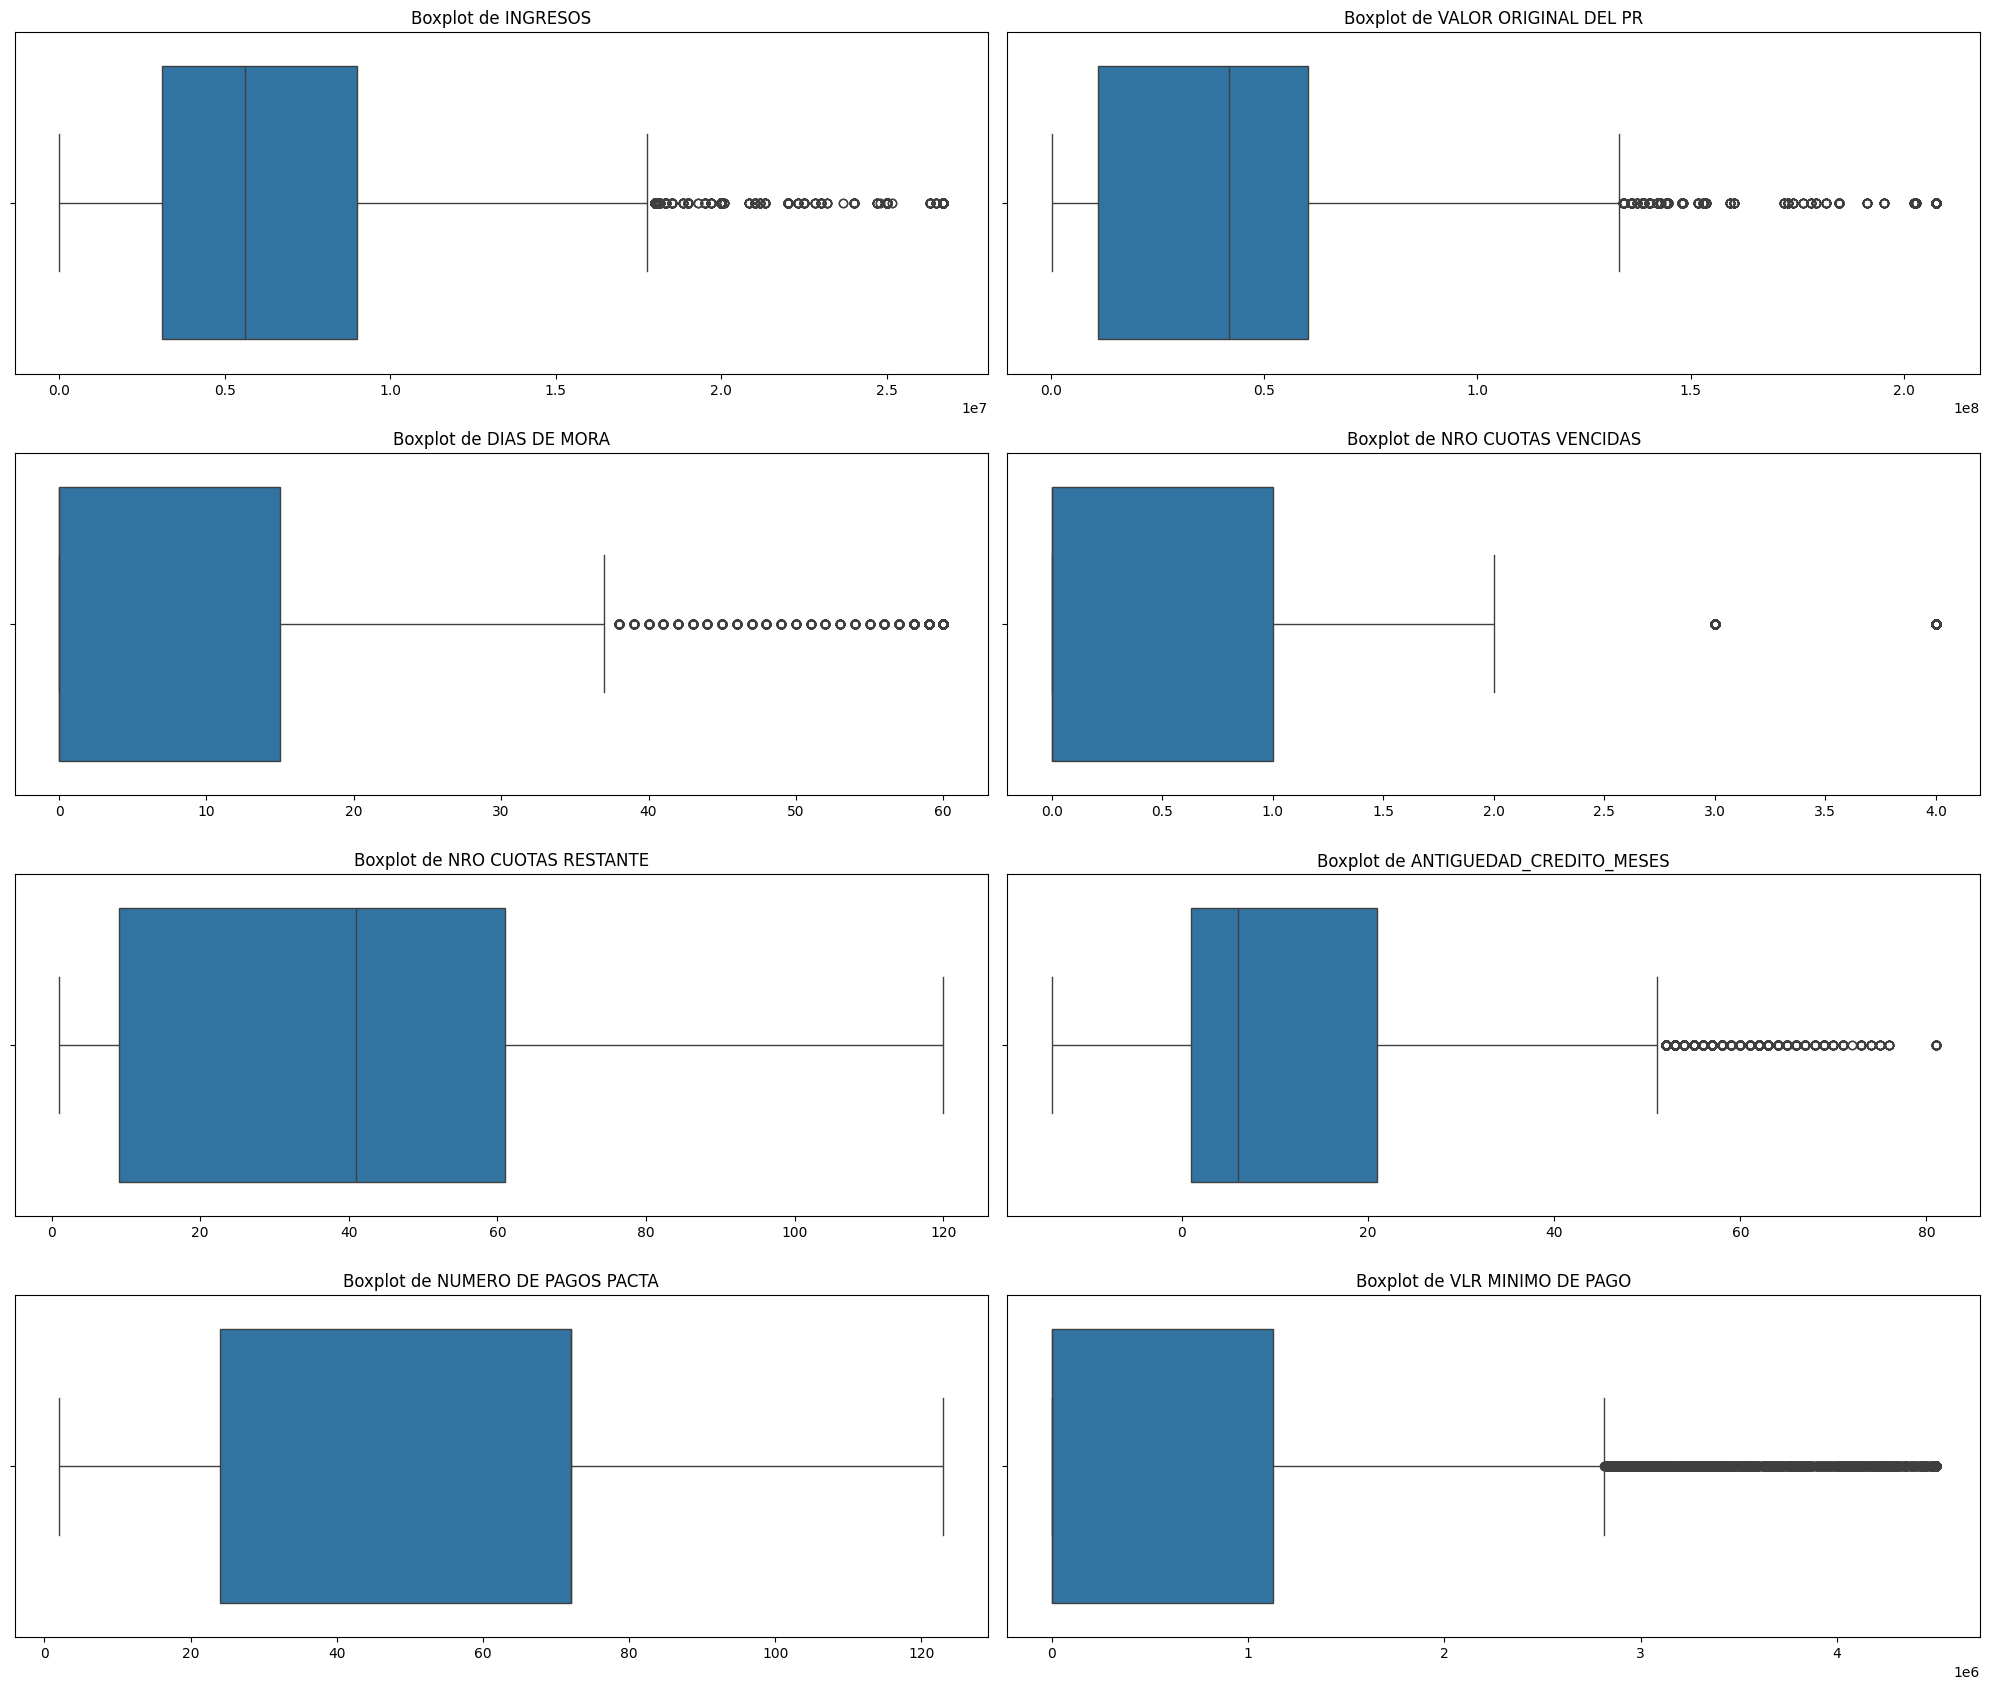

In [324]:
# Boxplots en subgráficos
plt.figure(figsize=(20, 25))

for i, col in enumerate(variables_numericas):
    plt.subplot(6, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

### **Codificación variables categoricas**

One-Hot Encoding aplicado

Se transformaron todas las variables categóricas en columnas binarias usando One-Hot Encoding.

- Cada nueva columna representa una categoría específica.
- `1` indica que el registro pertenece a esa categoría.
- `0` indica que no pertenece.

Se usó `drop_first=True` para evitar duplicidad de información y multicolinealidad.


In [325]:
# 1. Identificar columnas categóricas tipo 'object'
cat_cols = df.select_dtypes(include='object').columns.tolist()

# 2. Aplicar One-Hot Encoding a todas las columnas categóricas
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 3. Convertir booleanos a enteros (0/1)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

print("One-Hot Encoding aplicado a todas las columnas categóricas.")


One-Hot Encoding aplicado a todas las columnas categóricas.


#### **Normalizacion variables numericas**

In [326]:
# 1. Variables a excluir de la normalización
excluir = [
    'NUMERO DE LA COLOCACION', 'NUMERO DE IDENTIFICACION DEUDOR',
    'NUMERO DEL PRODUCTO', 'NUMERO DE LA AGENCIA', 'MORA_ACTUAL',
    'MORA_SIGUIENTE', 'ESTADO_MORA_SIGUIENTE'
]

# 2. También excluir todas las variables dummies (binarias)
excluir += [col for col in df.columns if (
    df[col].nunique() == 2 and set(df[col].unique()) <= {0, 1}
)]

# 3. Seleccionar variables numéricas a escalar
variables_a_escalar = [col for col in df.select_dtypes(include=['int64', 'float64']).columns
                       if col not in excluir]

# 4. Escalar
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[variables_a_escalar] = scaler.fit_transform(df[variables_a_escalar])

print("Variables numéricas escaladas correctamente.")


Variables numéricas escaladas correctamente.


In [327]:
df_scaled

,NUMERO DE LA COLOCACION,NUMERO DE IDENTIFICACION DEUDOR,NUMERO DEL PRODUCTO,NUMERO DE LA AGENCIA,PLAZO UNIDAD TIEMPO,PLAZO EN DIAS,NUMERO DE PAGOS PACTA,VALOR ORIGINAL DEL PR,CAPITAL PEND POR FACT,SALDO DEL PRESTAMO,NRO PLAN PAGOS VIGENT,NRO DE UTILIZACINES D,DIAS DE MORA,VLR ULTIMO PAGO,VLR TASA,VLR CUOTA MES,VLR MINIMO DE PAGO,DIA VENCIMIENTO CUOTA,NRO CUOTAS VENCIDAS,NRO CUOTAS PAGADAS,NRO CUOTAS RESTANTE,ACIERTA,ANTIGÜEDAD LABORAL,NUMERO DE PERSONAS A CARGO,INGRESOS,MORA_ACTUAL,MORA_SIGUIENTE,ESTADO_MORA_SIGUIENTE,ANTIGUEDAD_CREDITO_MESES,DIAS_HASTA_PROX_PAGO,DIAS_DESDE_ULTIMO_PAGO,DIAS_CUOTA_PENDIENTE,CALIFICACION CARTERA_AA,CALIFICACION CARTERA_B,CALIFICACION CARTERA_BB,CALIFICACION CARTERA_C,CALIFICACION CARTERA_CC,CALIFICACION CARTERA_D,CALIFICACION CARTERA_E,CALIFICACION CARTERA_IN,NIVEL DE ESTUDIOS_BASICA PRIMARIA,NIVEL DE ESTUDIOS_ESPECIALIZACION,NIVEL DE ESTUDIOS_MAESTRA,NIVEL DE ESTUDIOS_NO REGISTRA,NIVEL DE ESTUDIOS_PROFESIONAL,NIVEL DE ESTUDIOS_TECNICO,NIVEL DE ESTUDIOS_TECNICO PROFESIONAL,NIVEL DE ESTUDIOS_TECNOLOGICO,MARCA_BMW,MARCA_CHANGAN,MARCA_CHEVROLET,MARCA_CITROEN,MARCA_DFSK,MARCA_DODGE,MARCA_DONGFENG,MARCA_FIAT,MARCA_FORD,MARCA_FOTON,MARCA_FUSO,MARCA_GREAT WALL,MARCA_HINO,MARCA_HONDA,MARCA_HYUNDAI,MARCA_JAC,MARCA_JEEP,MARCA_JETOUR,MARCA_JMC,MARCA_KARRY,MARCA_KENWORTH,MARCA_KIA,MARCA_MAZDA,MARCA_MERCEDES BENZ,MARCA_MITSUBISHI,MARCA_NISSAN,MARCA_NO HAY,MARCA_PEUGEOT,MARCA_RENAULT,MARCA_SHINERAY,MARCA_SIN INFORMACION,MARCA_SMW,MARCA_SSANGYONG,MARCA_SUBARU,MARCA_SUZUKI,MARCA_TOYOTA,MARCA_VOLKSWAGEN,MARCA_VOLVO,TIPO DE SOLICITANTE_INDEPENDIENTE,TIPO DE SOLICITANTE_SIN INFORMACION,TIPO DE SOLICITANTE_TAXISTA,TIPO DE SOLICITANTE_TRANSPORTADOR,TIPO DE ID_CEDULA,TIPO DE ID_CEDULA DE EXTRANJERIA,TIPO DE ID_NIT,TIPO DE ID_OTROS,TIPO DE ID_SIN INFORMACION,OCUPACIÓN_COMERCIANTE,OCUPACIÓN_OTRO,OCUPACIÓN_PROFESIONAL INDEPENDIENTE,OCUPACIÓN_RENTISTA DE CAPITAL,OCUPACIÓN_SIN INFORMACION,TIPO DE VIVIENDA_FAMILIAR,TIPO DE VIVIENDA_PROPIA,TIPO DE VIVIENDA_SIN INFORMACION,ESTADO CIVIL_DIVORCIADO,ESTADO CIVIL_RELIGIOSO,ESTADO CIVIL_SEPARADO,ESTADO CIVIL_SIN INFORMACION,ESTADO CIVIL_SOLTERO,ESTADO CIVIL_UNION LIBRE,ESTADO CIVIL_VIUDO,TIPO DE VEHICULO_OTRO,TIPO DE VEHICULO_SIN INFORMACION,TIPO DE VEHICULO_USADO,TIPO DE SERVICIO_PARTICULAR,TIPO DE SERVICIO_PUBLICO,TIPO DE SERVICIO_SIN INFORMACION,PRODUCTO_POLIZA ANT,PRODUCTO_POLIZA MASCOTAS,PRODUCTO_POLIZA TODO RIESGO,PRODUCTO_POSVENTA,PRODUCTO_VEHICULO ALIVIO,PRODUCTO_VEHICULO COMERCIAL,PRODUCTO_VEHICULO CONSUMO,PRODUCTO_VEHICULO NOVACION
4,199,1013601031,9,223,-0.056183,-0.058027,-0.155569,0.256714,-0.724514,-0.684820,1.786292,1.706156,0.116996,0.051913,-0.168275,0.019858,0.500046,0.770184,0.332489,1.726225,-1.241328,-2.117221,-0.079450,-0.184199,1.231965,0,1.0,1,3.475388,-1.404506,1.149804,1.368215,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3091,199,1013601031,9,223,-0.056183,-0.058027,-0.155569,0.256714,-0.753459,-0.684820,1.786292,1.774853,1.480738,0.051913,-0.350918,0.019858,1.606334,0.770184,1.223861,1.726225,-1.241328,-2.117221,-0.079450,-0.184199,1.231965,1,0.0,2,3.475388,-1.177173,1.149804,1.368215,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
6199,199,1013601031,9,223,-0.056183,-0.058027,-0.155569,0.256714,-0.782987,-0.739893,1.786292,1.843551,0.116996,0.086294,-0.400910,0.019858,0.417425,0.770184,0.332489,1.845087,-1.315541,-2.117221,-0.079450,-0.184199,1.231965,0,1.0,1,3.475388,-0.934162,0.721202,0.932628,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
9294,199,1013601031,9,223,-0.056183,-0.058027,-0.155569,0.256714,-0.964675,-0.739893,1.786292,1.912248,1.5

In [328]:
# Ruta donde se guardará el archivo
ruta_csv_completo = r"C:\Users\USER\OneDrive - universidadean.edu.co\2. Semestre\Seminario de investigación\Modulo 2\Modelo ML\data\processed\df_completo_escalado.csv"

# Guardar como CSV
df_scaled.to_csv(ruta_csv_completo, index=False)

print(f"✅ Dataset completo guardado como CSV en:\n{ruta_csv_completo}")


✅ Dataset completo guardado como CSV en:
C:\Users\USER\OneDrive - universidadean.edu.co\2. Semestre\Seminario de investigación\Modulo 2\Modelo ML\data\processed\df_completo_escalado.csv


In [329]:

# 1. Separar X e y
X = df_scaled.drop(columns=['ESTADO_MORA_SIGUIENTE', 'MORA_ACTUAL', 'MORA_SIGUIENTE'])
y = df_scaled['ESTADO_MORA_SIGUIENTE'].astype(int)

# 2. Aplicar SelectKBest con test F (ANOVA)
selector = SelectKBest(score_func=f_classif, k=60)  # Puedes cambiar k si quieres ver más
selector.fit(X, y)

# 3. Obtener las variables seleccionadas y sus puntajes
indices_seleccionados = selector.get_support(indices=True)
variables_seleccionadas = X.columns[indices_seleccionados]
scores = selector.scores_[indices_seleccionados]

# 4. Mostrar resultados ordenados por importancia
resultado = pd.DataFrame({
    'Variable': variables_seleccionadas,
    'Score': scores
}).sort_values(by='Score', ascending=False)

# Visualizar
resultado.reset_index(drop=True, inplace=True)
display(resultado)

,Variable,Score
0,DIAS DE MORA,76309.465631
1,NRO CUOTAS VENCIDAS,46156.807169
2,VLR MINIMO DE PAGO,10350.866362
3,CALIFICACION CARTERA_E,4404.652024
4,PRODUCTO_VEHICULO ALIVIO,3949.769560
5,CALIFICACION CARTERA_D,2321.997683
6,DIAS_CUOTA_PENDIENTE,1933.671861
7,CALIFICACION CARTERA_B,1595.416929
8,CALIFICACION CARTERA_C,1181.377631
9,NUMERO DEL PRODUCTO,1030.750546


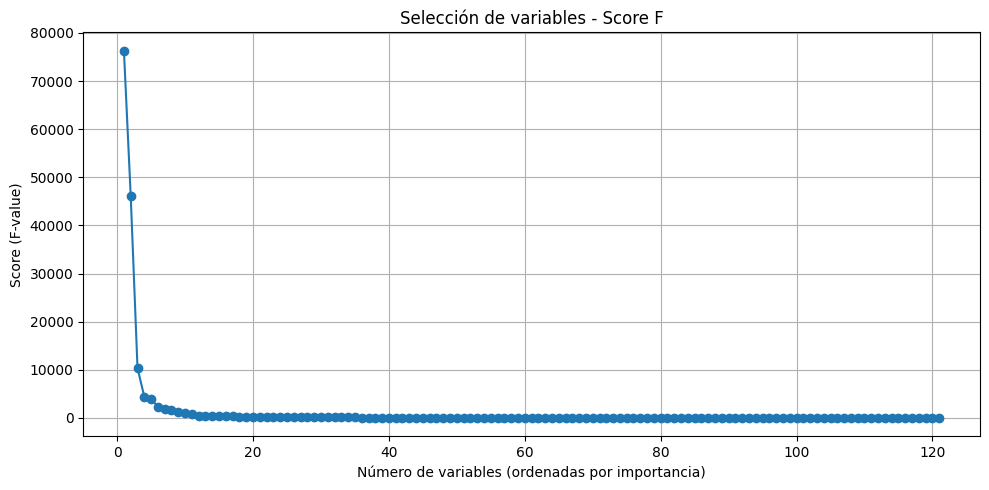

In [330]:
# Ordenar todos los scores para graficar
all_scores = selector.scores_
sorted_scores = sorted(all_scores, reverse=True)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(sorted_scores) + 1), sorted_scores, marker='o')
plt.title("Selección de variables - Score F")
plt.xlabel("Número de variables (ordenadas por importancia)")
plt.ylabel("Score (F-value)")
plt.grid(True)
plt.tight_layout()
plt.show()


### **Reducción de dimensionalidad con PCA**

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_30644\3779522956.py:24: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\USER\OneDrive - universidadean.edu.co\2. Semestre\Seminario de investigación\Modulo 2\Modelo ML\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


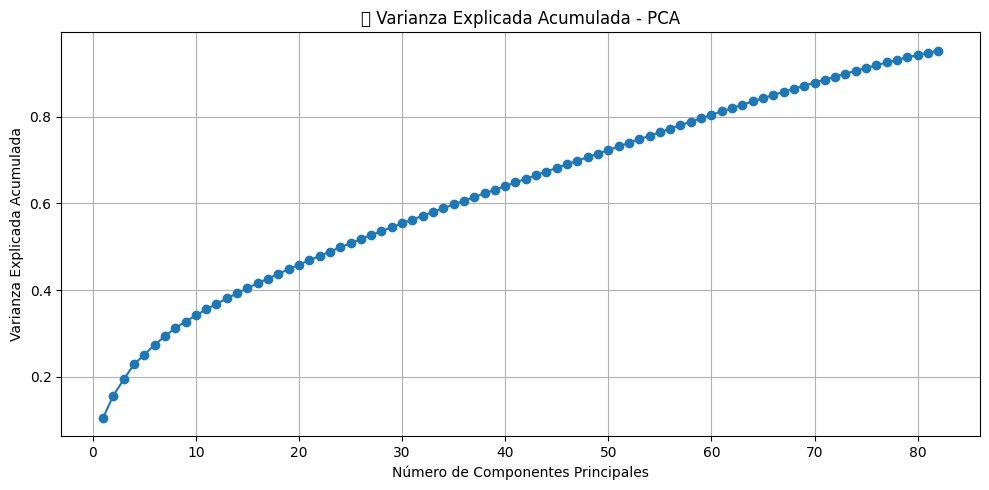

✅ CSV guardado exitosamente en:
C:\Users\USER\OneDrive - universidadean.edu.co\2. Semestre\Seminario de investigación\Modulo 2\Modelo ML\data\processed\df_pca_95.csv


In [331]:
# 1. Separar X e y
X = df_scaled.drop(columns=['ESTADO_MORA_SIGUIENTE', 'MORA_ACTUAL', 'MORA_SIGUIENTE'])
y = df_scaled['ESTADO_MORA_SIGUIENTE'].astype(int)

# 2. Escalar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicar PCA (mantener 95% de varianza)
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 4. Gráfico de varianza explicada acumulada
plt.figure(figsize=(10, 5))
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    pca.explained_variance_ratio_.cumsum(),
    marker='o'
)
plt.title("📈 Varianza Explicada Acumulada - PCA")
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Explicada Acumulada")
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Crear DataFrame con componentes principales + etiqueta
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca['ESTADO_MORA_SIGUIENTE'] = y.values

# 6. Guardar como archivo CSV en la ruta especificada
ruta_salida = r"C:\Users\USER\OneDrive - universidadean.edu.co\2. Semestre\Seminario de investigación\Modulo 2\Modelo ML\data\processed\df_pca_95.csv"
df_pca.to_csv(ruta_salida, index=False)

print(f"✅ CSV guardado exitosamente en:\n{ruta_salida}")

